# Notebook Lecture 5: Transfer Functions
© 2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

This interactive notebook covers the basics of response to exponential inputs, transfer functions, conversions between state-space models and transfer functions, and connections to Laplace transforms. 

Authors:
- Felix Muller; fmuller@ethz.ch
- Mark Benazet Castells; mbenazet@ethz.ch



## Learning Objectives



In previous lectures, we've seen that this course addresses the control of dynamical systems. Two key course objectives are to understand how to analyze and synthesize systems to achieve specific goals. To do this effectively, we need to understand various ways of representing and analyzing dynamical systems mathematically.
In this notebook, we delve deeper into some fundamental concepts and techniques used in control systems analysis. We'll explore system responses and different system representations.
After completing this notebook, you should be able to:

- Understand and analyze a system's response to elementary inputs.
- Interpret and work with transfer functions.
- Convert between state-space models and transfer functions.
- Appreciate the role of Laplace transforms in control systems analysis and how they relate to system behavior.


### Import the packages:



The following cell imports the required packages. Run it before running the rest of the notebook.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, FloatSlider

# Motivation


In Lecture 4, we observed that analyzing the time response of a Linear Time-Invariant (LTI) system can be quite challenging. Recall that the time time response is given by:

$$y(t) = Ce^{At}x(0) + \int_{0}^{t} C e^{A(t-\tau)}Bu(\tau)d\tau + Du(t)$$

This formula provides a complete characterization of the output response of an LTI system. However, the convolution integral makes it difficult to analyze the system's behavior if provided with complex inputs.

This raises the question: how can we effectively analyze the response of a system to more complex inputs?

To address this challenge, we will study the response of LTI systems to elementary inputs such as exponential and sinusoidal inputs. These inputs are particularly easy to analyze because the input has the same form as the output and are very rich, meaning they can be used to describe any other input through linear combinations.


# 1. Response to Elementary Inputs



In this section, we will study the response of an LTI system to elementary inputs -- first the exponential and then sinusoidal. 

> Throughout the section, it is important to keep in mind that the section is motivated by the fact that any input can be written as a linear combination of elementary inputs. Thus, the introduced concepts and behaviors are generalizable to any input.  

## 1.1 Definition of Elementary Inputs


Exponential inputs are a particularly interesting because it is an eigenfunction of the system. This means that the output of the system will be a scaled version of the input.

An elementary input is defined as:

$$u(t) = e^{st}$$

where $s \in \mathbb{C}$ is a complex number.

### Special Cases:

1. **Real Exponential**: If $s$ is real, then $u(t) = e^{st}$ is a simple exponential function.

2. **Sinusoidal**: If $s = j\omega$ is purely imaginary, then $u(t) = e^{j\omega t}$ represents a sinusoidal signal:
   
   $$u(t) + u^*(t) = e^{j\omega t} + e^{-j\omega t} = 2\cos(\omega t)$$

3. **Exponentially Modulated Sinusoid**: If $s = \sigma + j\omega$, then:
   
   $$u(t) + u^*(t) = e^{\sigma t}e^{j\omega t} + e^{\sigma t}e^{-j\omega t} = 2e^{\sigma t}\cos(\omega t)$$

   This represents a sinusoid with exponentially changing amplitude.

## 1.2 System Response to Exponential Inputs


For an LTI system described by the LTI state-space model:

\begin{align}
\dot{x}(t) &= Ax(t) + Bu(t) \\
y(t) &= Cx(t) + Du(t)
\end{align}

The response to an exponential input $u(t) = e^{st}$ is given by:

$$y(t) = Ce^{At}x(0) + C\int_0^t e^{A(t-\tau)}Be^{s\tau} d\tau + De^{st}$$

This can be simplified to:

$$y(t) = \underbrace{Ce^{At}\left(x(0) - (sI - A)^{-1}B\right)}_{\text{Transient Response } \rightarrow 0 \text{ (if as. stable)}} + \underbrace{\left(C(sI - A)^{-1}B + D\right)e^{st}}_{\text{Steady-State Response}}$$

<small><small>
See Lecture 5 page 7 for the derivation, also left as a task in the problem sheet. 
</small></small>

For an asymptotically stable system, the transient response will converge to zero as $t \to \infty$. 

The steady-state response can be re-written as:

$$y_{ss}(t) = G(s)e^{st}$$

where $G(s) = C(sI - A)^{-1}B + D$.

### Example: First-Order System


Consider the following RC circuit, where $R$ is the resistance and $C$ capacitance of the system: 
<p align="center">
   <img src="img/RC.jpg" width="400">
</p>

Suppose we wish to visualize the behavior of the system against inputs that are:
1. Real exponential. 
2. Sinusoidal.
3. Exponentially modulated sinusoids. 

For completeness, we provide the steps to solve for the steady-state response by determining $G(s)$. The results can be readily extended to determine the analytical transient response. 


#### Deriving G(s)


1) First, let's define our RC circuit:
   - $R$ is the resistance
   - $C$ is the capacitance
   - $v_c(t)$ is the voltage across the capacitor (our output)
   - $v_i(t)$ is the input voltage

2) Using Kirchhoff's laws, we can write the differential equation for the circuit:

   $$R C \frac{dv_c(t)}{dt} + v_c(t) = v_i(t)$$

3) Now, let's define our state variable. In this case, we choose the capacitor voltage:

   $$x(t) = v_c(t)$$

4) We can rewrite our differential equation in terms of x(t):

   $$R C \frac{dx(t)}{dt} + x(t) = v_i(t)$$

5) Rearranging this into standard state space form:

   $$\frac{dx(t)}{dt} = -\frac{1}{RC}x(t) + \frac{1}{RC}v_i(t)$$

6) Our output equation is simply:

   $$y(t) = x(t)$$

7) Now we have our state space representation:

   $$\frac{dx(t)}{dt} = -\frac{1}{RC}x(t) + \frac{1}{RC}v_i(t)$$
   $$y(t) = x(t)$$

   In standard form:
   $$\dot{x} = Ax + Bu$$
   $$y = Cx + Du$$

   Where:
   $$A = -\frac{1}{RC}, \quad B = \frac{1}{RC}, \quad C = 1, \quad D = 0$$

8) To get the transfer function, we use the formula:

   $$G(s) = C(sI - A)^{-1}B + D$$

9) Let's calculate:

   $$(sI - A) = (s + \frac{1}{RC})$$

   $$(sI - A)^{-1} = \frac{1}{s + \frac{1}{RC}}$$

10) Substituting into our transfer function formula:

   $$G(s) = 1 \cdot \frac{1}{s + \frac{1}{RC}} \cdot \frac{1}{RC} + 0$$

11) Simplifying:

   $$G(s) = \frac{1}{RCs + 1}$$

12) Let $\tau = RC$ define the time constant, then we get the standard form of a first-order system transfer function:

   $$G(s) = \frac{1}{\tau s + 1}$$

#### Interactive Example



Let's investigate the response of this system to an exponential input.
- Try changing $\sigma$ and $\omega$ such that you visualize the effects of the three types of inputs are present. What do you notice about the output behavior? Does this mimic the inputs?
- Try changing the time constant $\tau = RC$. What effect on the system output does this have?


One thing to note is that the steady state output eventually becomes the system output (as the transient output converges to zero). This **occurs in asymptotically stable systems** where the transient response decays over time, leaving only the steady-state response. The steady-state response is directly influenced by the input and $G(s)$.

The steady state response follows the same form as the input, but it is scaled by the transfer function of the system. 

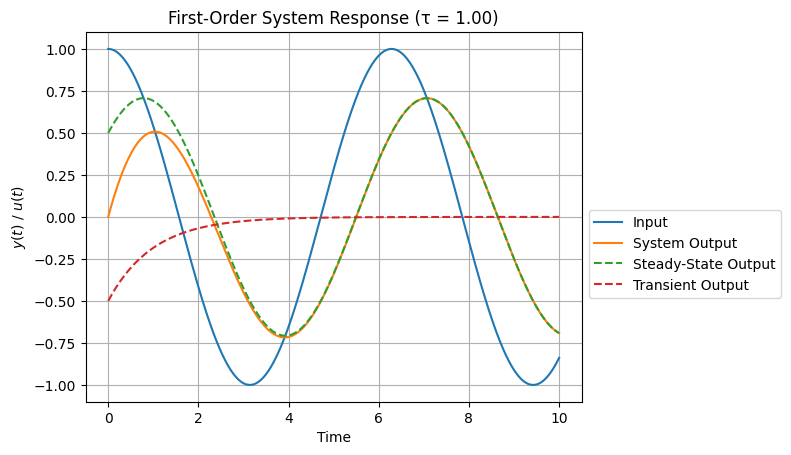

Output()

In [4]:
def plot_first_order_response(tau, sigma, omega, t_max):
    with output:
        clear_output(wait=True)  # Clear the previous output

        t = np.linspace(0, t_max, 1000)
        s = sigma + 1j * omega
        
        # System transfer function
        sys = signal.TransferFunction([1], [tau, 1])
        
        # Input signal (real part of the complex exponential)
        u = np.exp(sigma * t) * np.cos(omega * t)
        
        # Compute system response
        _, y, _ = signal.lsim(sys, U=u, T=t)
        
        # Compute steady-state response
        G_s = 1 / (tau * s + 1)
        gain = np.abs(G_s)
        phase = np.angle(G_s)
        y_ss = gain * np.exp(sigma * t) * np.cos(omega * t + phase)

        # Compute the transient response
        y_transient = y - y_ss
        
        # Plotting
        plt.figure()
        plt.plot(t, u, label='Input')
        plt.plot(t, y, label='System Output')
        plt.plot(t, y_ss, '--', label='Steady-State Output')
        plt.plot(t, y_transient, '--', label='Transient Output')
        plt.title(f'First-Order System Response (τ = {tau:.2f})')
        plt.xlabel('Time')
        plt.ylabel(r'$y(t)$ / $u(t)$')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))  # Legend outside the plot on the right
        plt.grid(True)
        plt.show()

# Initialize a display object
output = widgets.Output()

tau_widget = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description='τ:')
sigma_widget = widgets.FloatSlider(min=-2, max=0, step=0.1, value=0, description='σ:')
omega_widget = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description='ω:')
t_max_widget = widgets.FloatSlider(min=1, max=20, step=1, value=10, description='t_max:')

column1 = widgets.VBox([sigma_widget, omega_widget])
column2 = widgets.VBox([tau_widget, t_max_widget])
slider_layout = widgets.HBox([column1, column2])

widgets.interactive_output(plot_first_order_response, 
                           {'tau': tau_widget,
                            'sigma': sigma_widget,
                            'omega': omega_widget,
                            't_max': t_max_widget})

display(slider_layout, output)


## 1.3 System Response to Sinusoidal Inputs


Sinusoidal inputs are particularly interesting in the study of Linear Time-Invariant (LTI) systems due to a fundamental property: the output of an LTI system to a sinusoidal input is also sinusoidal, with the same frequency as the input, but potentially different amplitude and phase. This property is crucial in understanding frequency response and forms the basis for many control system analysis techniques.

Consider a sinusoidal input of the form:

$$u(t) = e^{j\omega} + e^{-j\omega} = 2\cos{\omega t}$$

For an LTI system with function $G(s)$, the output $y(t)$ can be expressed as:

$$y(t) = G(j\omega)e^{j\omega t} + G(-j\omega)e^{-j\omega t}$$
Using Euler's formula and the properties of complex conjugates, we can simplify this to:

$$y(t) = |G(j\omega)|\cos(\omega t + \angle G(j\omega))$$

Where:
- $|G(j\omega)|$ is the **magnitude** of the transfer function at frequency $\omega$
- $\angle G(j\omega)$ is the **phase** angle of the transfer function at frequency $\omega$

> You will see in more detail next week how to compute the phase and magnitude of $G(s)$.


### Revisiting the RC Example


Recall, for our first-order RC system:

$$G(s) = \frac{1}{\tau s + 1}$$

To find the response, we substitute $s$ with $j\omega$:

$$G(j\omega) = \frac{1}{\tau j\omega + 1}$$

Magnitude:
   
$$
\begin{align}
|G(j\omega)| &= \left|\frac{1}{\tau j\omega + 1}\right| \\
&= \left| \frac{1}{\tau j\omega + 1} \cdot \frac{1-\tau j\omega}{1-\tau j\omega}\right| \\
&= \left| \frac{1 - \tau j\omega}{1 + \left(\tau\omega\right)^2} \right| \\
&= \sqrt{ \left(\frac{1}{1 + \left(\tau\omega\right)^2}\right)^2 + \left(\frac{- \tau \omega}{1 + \left(\tau\omega\right)^2} \right)^2}
\end{align}$$

Phase:
   
$$\angle G(j\omega) = \arctan \left(\frac{\frac{-\tau\omega}{1 + \left(\tau\omega\right)^2}}{\frac{1}{1 + \left(\tau\omega\right)^2}}\right)$$

> You will see in more detail next week how to compute the phase and magnitude of $G(s)$.

Then we know all the terms for the steady-state time respose: $$y_{ss}(t) = |G(j\omega)|\cos(\omega t + \angle G(j\omega))$$


#### Interactive Example


- Try increasing/decreasing the frequency, what do you notice about gain and phase of the output response? *Hint: Check the Gain and Phase Text Box* 
- What do you notice about the total vs steady state response. Does this align with your intuition?

(answers below the output)

In [ ]:
def plot_lti_response(omega, tau):
    # Define the first-order LTI system
    num = [1]
    den = [tau, 1] 
    sys = signal.TransferFunction(num, den)

    # Generate input and output
    t = np.linspace(0, 10*tau, 1000)  # Adjust time range based on tau
    u = np.cos(omega * t)
    _, y, _ = signal.lsim(sys, u, t)

    # Calculate the theoretical gain and phase shift
    w, mag, phase = signal.bode(sys, w=[omega])
    gain = 10**(mag[0]/20)
    phase_shift = np.deg2rad(phase[0])

    # Plot
    plt.figure()
    plt.plot(t, u, label='Input', alpha=0.7)
    plt.plot(t, y, label='Total Response', alpha=0.7)
    plt.plot(t, gain * np.cos(omega * t + phase_shift), '--', label='Steady-State Response', alpha=0.7)
    plt.title(f'First-Order RC System Response (ω = {omega:.2f} rad/s, τ = {tau:.2f} s)')
    plt.xlabel('Time (s)')
    plt.ylabel(r'$y(t)$ / $u(t)$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))  # Legend outside the plot on the right
    plt.grid(True)

    # Display gain and phase information
    plt.text(1.1, 0.8, f'Gain: {gain:.2f}\nPhase Shift: {np.rad2deg(phase_shift):.2f}°',
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    plt.show()

# Create an interactive widget
interactive_plot = interactive(plot_lti_response,
                               omega=FloatSlider(min=0.0, max=15, step=0.01, value=1,
                                                 description='Frequency (rad/s)'),
                               tau=FloatSlider(min=0.1, max=5, step=0.1, value=1,
                                               description='Time Constant τ (s)'))

# Display the interactive plot
display(interactive_plot)

Later on we will see that the below behaviors help describe the frequency response of the system. Nevertheless, it is interesting to note the link to the time response.
**Magnitude (Gain)**:
- At low frequencies $\left(\omega << \frac{1}{\tau}\right)$, $|G(j\omega)| ≈ 1$. 
- At high frequencies $\left(\omega >> \frac{1}{\tau}\right)$, $|G(j\omega)| ≈ \frac{1}{\tau\omega})$.

**Phase**:
- At low frequencies, the phase shift is close to 0°
- At high frequencies, the phase shift approaches -90°
- At ω = 1/τ, the phase shift is -45°

Yes the output aligns with what we have previously seen. For an asymptotically stable system, which this is, the transient response tends to zero, and thus, after some time, the steady-state output is the total response of the system. 


# 2. The Transfer Function


In the previous section we often relied on $G(s)$ to represent the behavior of the (asymptotically stable) system. In fact, $G(s)$ is known as the transfer function, and is defined as follows:

> A transfer function is a function $G: s \to G(s)$ that transforms inputs into steady-state outputs. More formally, it is the ratio of the Laplace Transforms of the output over the input. 

We will, through the following lectures, learn that the transfer function is a fundamental representation that allows us to readily apply control synthesis and analysis tools. Nevertheless, in this lecture we focus on how to determine it. For completeness, we briefly cover how to determine the transfer function from a state-space model (and how to determine the state-space from a transfer function) below.

### From State-Space to Transfer function


As we will later see, when analyzing or synthesizing a system, it is useful and convenient to have the transfer function of the system. Thus, here, provided with a state-space LTI model, we briefly introduce how to determine the transfer function.

Given an LTI model:
\begin{align}
\dot{x}(t) &= Ax(t) + Bu(t) \\
y(t) &= Cx(t) + Du(t)
\end{align}

We can determine $G(s)$ by either:

1. Using the aforementioned $G(s) = C(sI - A)^{-1}B + D$. (Such as in Example 1 above)
2. Taking the Laplace Transform of the LTI system, and then rearranging it such that $\frac{Y(s)}{U(s)} = G(s)$

In fact, by taking the Laplace Transform of the LTI system, it can be derived that $G(s) = C(sI - A)^{-1}B + D$ (spoiler: it's a task in the problem sheet), and thus for LTI systems both approaches are equivalent, where the latter is more generic. 


### From Transfer Function to State-Space


We are often interested in the minimum realization of a system -- I.e., the smallest order of the system that captures the same input-output behavior. This form has several advantages, relying on the fact that it is often preferable to remove unnecessary information when possible.

Provided with a transfer function, it is then possible to determine the minimum realization of the state-space model in the controllable canonical form using the below relationship.  

$$G(s) = \frac{b_{n-1}s^{n-1} + b_{n-2}s^{n-2}+\dots+b_0}{s^n + a_{n-1}s^{n-1}+\dots+a_0} + d $$

$$
\begin{align}
A &= \begin{bmatrix} 0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0 \\
\vdots & \vdots  & \vdots &\ddots & \vdots \\
0 & 0 & 0 & & 1\\
-a_0 & -a_1 & -a_2 & \dots & -a_{n-1}
\end{bmatrix}, \quad 
&B& = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ 1\end{bmatrix} \\
C &= \begin{bmatrix} b_0 & b_1 & \dots & & b_{n-1} \end{bmatrix}, \quad 
&D& = [d]
\end{align}
$$

Furthermore, in the special case that the transfer function is written as a partial fraction expansion, the realization of the system is as follows:

$$
G(s) = \frac{p_1}{s-\lambda_1} + \frac{p_2}{s-\lambda_2} + \dots + \frac{p_n}{s-\lambda_n} + d
$$

$$
\begin{align}
A &= \begin{bmatrix}
\lambda_1 & & \\
& \ddots & \\
& & \lambda_n
\end{bmatrix}, \quad 
& B & = \begin{bmatrix} \sqrt{p_1} \\ \vdots \\ \sqrt{p_n} \end{bmatrix} \\
C &= \begin{bmatrix} \sqrt{p_1} & \dots & \sqrt{p_n} \end{bmatrix}, \quad
&D& = d
\end{align}
$$

# 3. The Laplace Transform


It was previously mentioned that it is possible to express any input $u(t)$ as a sum of complex exponentials. To do so, we can perform a Laplace Transform of the inputs. This section is dedicated towards contextualizing what the Laplace Transform is, and why it is useful. 

The Laplace transform lets us change information in the time domain to information in the frequency domain. Think back to the previous examples, and the corresponding transfer function $G(s)$, it is written as a function of $s=\sigma + jw$, and not of $t$. Hence, we can use the Laplace transform as a mapping between the time and frequency domain.

It is often advantageous to work in the frequency domain, since differential equations in the time domain often have simpler representations in the frequency domain. Furthermore, working in the frequency domain has some additional advantages with regard to system analysis and control synthesis (as we will see in the following lectures). 

 
To provide some intuition to contextualize the Laplace Transform, think that the Laplace Transform is a Generalized Fourier Transform. Below we hope to provide an intuitive understanding behind what it means to take the Laplace Transform. Nevertheless, a good introduction is also provided by the following video (note that there are many videos of this medium, so feel free to find one that suits you best):
- [The Laplace Transform - A Graphical Approach](https://youtu.be/ZGPtPkTft8g?si=tRpQIwrByDUBDq8Q) - Watch until 08:00, after that we have not covered the relevant information. 

## Fourier Transform


Any continuous signal in the time domain can be represented as a sum of sinusoids.

The Fourier Transform converts a time-domain signal into its frequency components. This is particularly useful for analyzing periodic signals or any signal with oscillatory components. The Fourier transform is defined as:

$$
\mathcal{F}[u(t)] = F(\omega) = \int_{-\infty}^{\infty} u(t) e^{-j\omega t} dt
$$

The Fourier transform is essentially multiplying our function with a sine and cosine function at every frequency $\left(u(t) e^{-j\omega t}\right)$ and then adds up the area under the resulting function through integration. If $u(t)$ contains an oscillatory frequency, the multiplication at that frequency will be non-zero.

In simpler terms, the Fourier Transform decomposes a function in terms of pure sine and cosine functions. 

Let's visualize this with the following example.


### Interactive Example

Suppose that we have a sinusoidal input:
- If it consists of only a single frequency and non-zero amplitude, then the Fourier transform plot consists of a peak at that frequency.
- Try adding another frequency to the signal by making the Amplitude 2 non-zero. Note that in the left plot, we now get two peaks representing the two oscillatory frequencies in the signal. Note that the magnitude of the signals differ. This just indicate which of the two signals is more prevalent. 
- Try adding the third non-zero amplitude. Note that, similar to before, now we have another peak at that Frequency 3, and that the amplitude of the signals is analogous to the amplitudes of the individual components.

In [ ]:
def plot_fourier_transform(frequency1, amplitude1, 
                           frequency2, amplitude2, 
                           frequency3, amplitude3):
    with output:
        clear_output(wait=True)  # Clear the previous output   
        # Time settings
        t = np.linspace(0, 1, 1000, endpoint=False)  # time from 0 to 1 second
        
        # Create a signal composed of three sine waves with different frequencies and amplitudes
        signal = amplitude1 * np.sin(2 * np.pi * frequency1 * t) + \
                amplitude2 * np.sin(2 * np.pi * frequency2 * t) + \
                amplitude3 * np.sin(2 * np.pi * frequency3 * t)

        # Perform the Fourier Transform
        signal_fft = fft(signal)
        frequencies = fftfreq(t.size, t[1] - t[0])

        # Limit the frequencies to only positive values (up to Nyquist frequency)
        pos_frequencies = frequencies[:t.size // 2]
        pos_signal_fft = np.abs(signal_fft[:t.size // 2])  # Magnitude of the Fourier Transform

        # Plot the original signal (time domain)
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(t, signal)
        plt.title('Time Domain Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')

        # Plot the Fourier Transform (frequency domain - magnitude)
        plt.subplot(1, 2, 2)
        plt.stem(pos_frequencies, pos_signal_fft, 'b', markerfmt=" ", basefmt="-b")
        plt.title('Magnitude of Fourier Transform')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Magnitude')
        plt.xlim(0, 100)  # Limit x-axis to show a reasonable range of frequencies

        plt.tight_layout()
        plt.show()

outputs = widgets.Output()

frequency_1_slider = widgets.FloatSlider(min=1, max=99, step=1, value=5, description='Freq 1 [Hz]')
amplitude_1_slider = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description='Amplitude 1')
frequency_2_slider = widgets.FloatSlider(min=1, max=99, step=1, value=10, description='Freq 2 [Hz]')
amplitude_2_slider = widgets.FloatSlider(min=0.0, max=5, step=0.1, value=0, description='Amplitude 2')
frequency_3_slider = widgets.FloatSlider(min=1, max=99, step=1, value=50, description='Freq 3 [Hz]')
amplitude_3_slider = widgets.FloatSlider(min=0.0, max=5, step=0.1, value=0, description='Amplitude 3')

column1 = widgets.VBox([frequency_1_slider, amplitude_1_slider])
column2 = widgets.VBox([frequency_2_slider, amplitude_2_slider])
column3 = widgets.VBox([frequency_3_slider, amplitude_3_slider])
slider_layout = widgets.HBox([column1, column2, column3])


# Create interactive sliders for frequency and amplitude
widgets.interactive_output(plot_fourier_transform, {
                            "frequency1": frequency_1_slider,
                            "amplitude1": amplitude_1_slider,
                            "frequency2": frequency_2_slider,
                            "amplitude2": amplitude_2_slider,
                            "frequency3": frequency_3_slider,
                            "amplitude3": amplitude_3_slider
                            })
display(slider_layout, output)

## The Laplace Bit

As you can see, the Fourier transform shows us which frequencies are present in our function, and at what magnitude they are present.

However, the problem with the Fourier transform is that it can only be used for a restrictive group of functions, namely functions composed of pure sinusoids. We are often dealing with functions that also incorporate an exponential term $e^{\sigma t}$ - Think of the time-response of an LTI system with complex eigenvalues from the Lecture 4. This is where the Laplace transform comes in.

The Laplace transform of a signal $u$ is defined as:
$$\mathcal{L}[u] = U(s) = \int_0^\infty u(t) e^{-st} dt$$

And the inverse Laplace transform is defined as:
$$\mathcal{L}^{-1}[U] = u(t) = \frac{1}{2\pi j} \lim_{\omega \to \infty} \int_{\sigma - j\omega}^{\sigma + j\omega} U(s) e^{s t} ds$$

The function in the Laplace transform is multiplied with $e^{-st} = e^{-\sigma t}e^{-j\omega t}$, instead of just $e^{-j\omega t}$ in the Fourier transform. This allows us to also capture the exponential information in our function and transform the whole function into the frequency domain.

This can be plotted analogously to the Fourier transform, with the difference that we add a third dimension to represent $\sigma$ -- i.e., the Fourier transform is the slice of the 3D Laplace plot. 


### Interactive plot


Suppose we wish to take the Laplace Transform of the signal: $u(t) = e^{-\alpha t} \sin(\omega t)$. 
The corresponding transform when plotted in 3D is visualized. 
Try changing the values of $\omega$ and $\alpha$, what behaviors do you note in the 3D plot? In the following weeks, we will connect how we can use such behaviors to analyze and synthesize a system. 

In [ ]:
# Define the signal: exponential decay combined with a sinusoidal component
def signal(t, alpha, omega_signal):
    return np.exp(-alpha * t) * np.sin(omega_signal * t)

# Define the Laplace Transform magnitude function for a decaying sinusoidal signal
def laplace_transform_magnitude(sigma, omega_s, alpha, omega_signal):
    # s = sigma + j*omega_s (complex)
    s = sigma + 1j * omega_s
    # Laplace transform of e^(-alpha*t) * sin(omega_signal * t) is:
    U_s = omega_signal / ((s + alpha)**2 + omega_signal**2)

    return np.abs(U_s)

# Function to create the time-domain plot and 3D Laplace transform plot with sliders
def plot_laplace_transform_and_time_domain(alpha, omega_signal):
    # Time settings
    t = np.linspace(0, 5, 1000)  # Time range from 0 to 5 seconds
    
    # Generate the time-domain signal
    signal_time_domain = signal(t, alpha, omega_signal)
    
    # Generate the grid for sigma (real part) and omega (imaginary part)
    sigma = np.linspace(-10, 10, 100)  # Range for real part (decay)
    omega_s = np.linspace(0, 10, 100)  # Range for imaginary part (frequency)
    sigma, omega_s = np.meshgrid(sigma, omega_s)

    # Compute the magnitude of the Laplace transform over the grid
    magnitude = laplace_transform_magnitude(sigma, omega_s, alpha, omega_signal)

    # Create the subplot figure with 1 row and 2 columns
    fig = plt.figure(figsize=(14, 5))

    # Plot the time-domain signal on the left
    ax1 = fig.add_subplot(121)
    ax1.plot(t, signal_time_domain)
    ax1.set_title('Time Domain Signal', fontsize=14)
    ax1.set_xlabel('Time [s]', fontsize=12)
    ax1.set_ylabel('Amplitude', fontsize=12)
    ax1.grid(True)

    # Plot the 3D Laplace transform on the right
    ax2 = fig.add_subplot(122, projection='3d')
    surf = ax2.plot_surface(sigma, omega_s, magnitude, cmap='coolwarm', edgecolor='none')

    ax2.set_title(r'Laplace Transform Magnitude for $u(t) = e^{-\alpha t} \sin(\omega t)$', fontsize=14)
    ax2.set_xlabel(r'Real Part $\sigma$', fontsize=12)
    ax2.set_ylabel(r'Imaginary Part $\omega$', fontsize=12)
    ax2.set_zlabel(r'Magnitude $|U(s)|$', fontsize=12)

    plt.show()

# Create interactive sliders for alpha (decay) and omega (frequency)
interactive_plot = interactive(plot_laplace_transform_and_time_domain, 
                               alpha=FloatSlider(min=-10, max=10, step=0.1, value=0, description='Decay Rate α'),
                               omega_signal=FloatSlider(min=0, max=10, step=0.5, value=5, description='Frequency ω')
                              )

# Display the interactive plot
display(interactive_plot)